<a href="https://colab.research.google.com/github/Ksenyff/AI/blob/main/Correlation_Analysis_lll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Корреляционный анализ** - это статистический метод для оценки **зависимости** между двумя переменными. Целями этого анализа является определения **наличия** корреляции между величинами, **направления** и **силы** этой связи.

Корреляционный анализ включает в себя следующие шаги:
- выбор коэффициента корреляции, исходя из свойств данных (распределение, размер, тип данных, смещение)
- подготовка данных (ранжирование, нормализация)
- вычисление коэффициента корреляции
- проверка значимости коэффициента корреляции (t-критерий Стьюдента)
- интерпретация результатов (наличие корреляции, направление, сила связи)


*Корреляционный анализ зачастую проводится перед регрессионным, чтобы отсеять факторы, которые не влияют на отклик и упростить вычисления*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [ ]:
def get_linear_data():
  # sample
  X = np.linspace(0, 10, 10)
  Y = np.linspace(0, 5, 10) + np.random.normal(loc=0, scale=0.1, size=X.shape)
  n = len(X)
  return X, Y, n

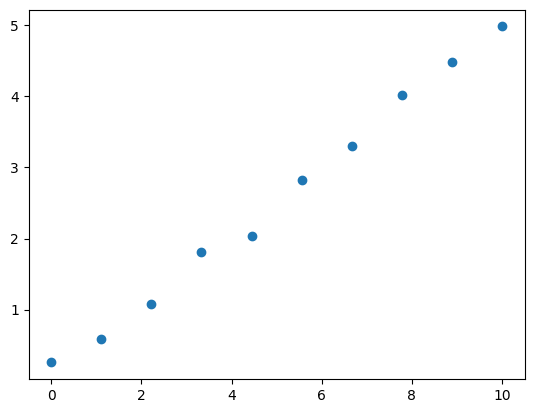

In [ ]:
X, Y, n = get_linear_data()
plt.scatter(X,Y)
plt.show()

## Математический аппарат

### Ковариация
Ковариация - это величина, которая характеризует взаимосвязь двух случайных величин и показывает ТОЛЬКО направление этой зависимости. Для выборок X и Y размера n ковариация равна
$$
cov(X,Y)=\frac{\sum_{i=1}^{n}(X_i-\mu_X)(Y_i-\mu_Y)}{n - 1}
$$

Ковариационная матрица для выборок X и Y равна

$$
\sum=
\begin{bmatrix}
cov(X,X) & cov(X,Y) \\
cov(Y,X) & cov(Y,Y) \\
\end{bmatrix}
$$

In [ ]:
# среднее значение выборки Х (мат ожидание)
def mean(X):
  return np.sum(X) / len(X)

# ковариация для выборок X и Y
def cov(X, Y):
  X_mean = mean(X)
  Y_mean = mean(Y)
  n = len(X)
  sum_arr = [(x - X_mean) * (y - Y_mean) for x, y in zip(X, Y)]
  return np.sum(sum_arr) / (n-1)

In [ ]:
X, Y, n = get_linear_data()

print(f"cov(X, Y) = cov(Y, X) = {cov(X, Y)}")
print(f"cov(X, X) = {cov(X, X)}")
print(f"cov(Y, Y) = {cov(Y, Y)}")

cov(X, Y) = cov(Y, X) = 5.586069775261344
cov(X, X) = 11.316872427983538
cov(Y, Y) = 2.7722959740393125


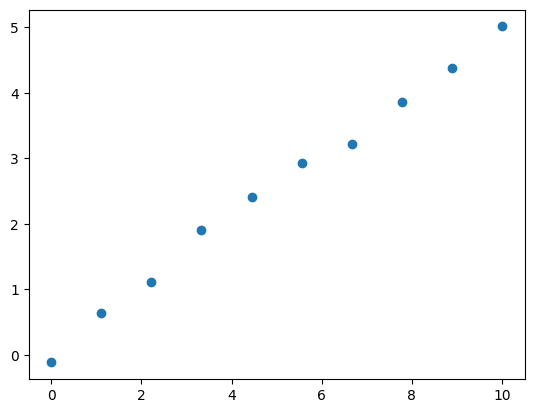

In [ ]:
plt.scatter(X,Y)
plt.show()

Для подсчета ковариации используем np.cov(). Метод возвращает ковариационную матрицу

In [ ]:
cov_matrix = np.cov(X, Y)
print(f"cov_matrix(X,Y) = {cov_matrix}")

cov_matrix(X,Y) = [[11.31687243  5.58606978]
 [ 5.58606978  2.77229597]]


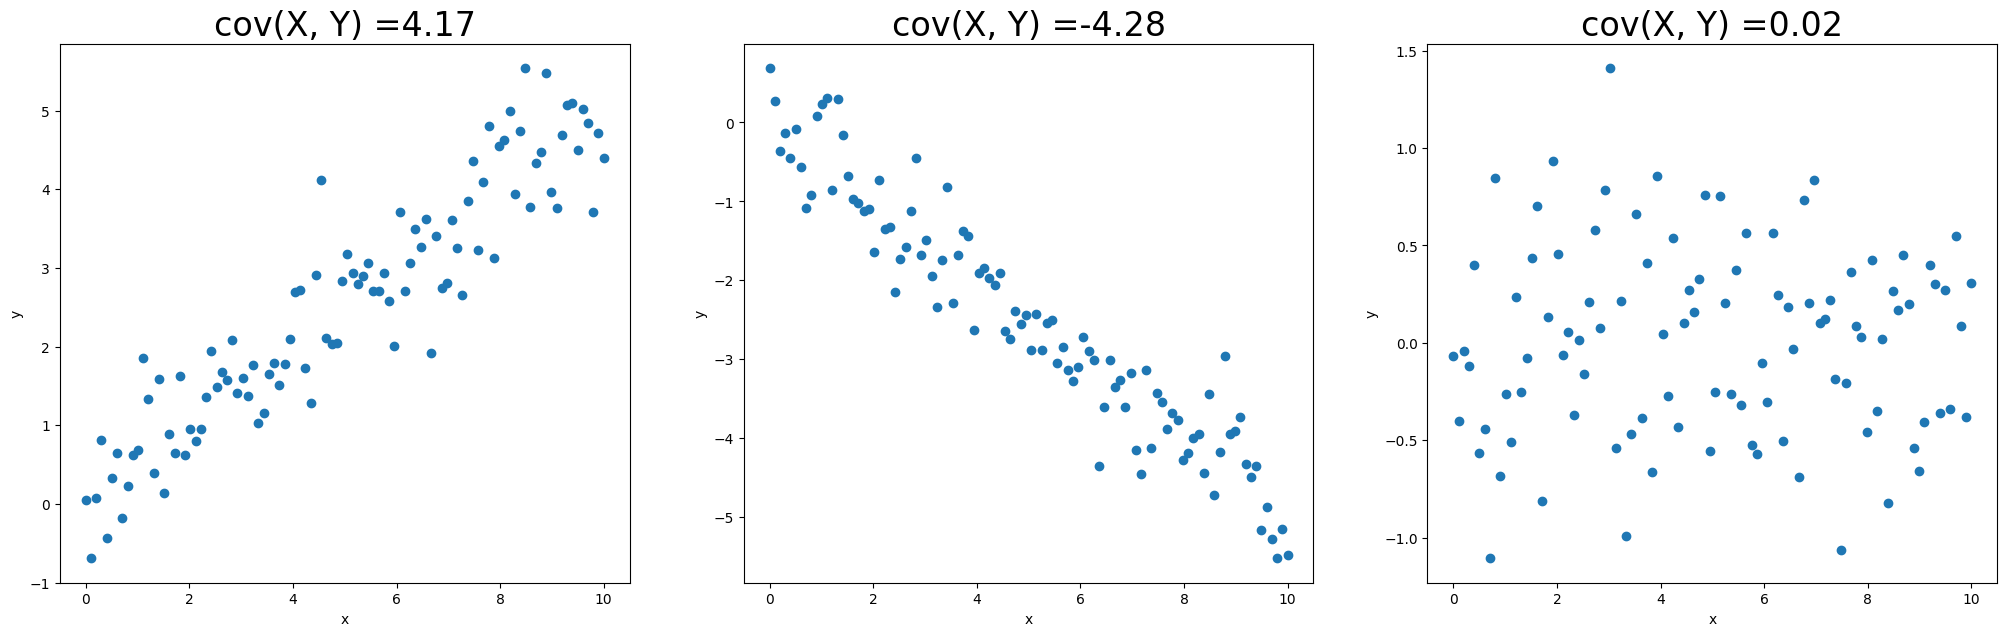

In [ ]:
fig = plt.figure(figsize=(25, 7))
variance = 0.5

plt.subplot(131)

# sample
n = 100
X = np.linspace(0, 10, n)
Y = np.linspace(0, 5, n) + np.random.normal(loc=0, scale=variance, size=X.shape)

plt.title(f'cov(X, Y) ={cov(X,Y):.2f}', fontsize=24)
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X, Y, label='data points')

plt.subplot(132)

# sample
n = 100
X = np.linspace(0, 10, n)
Y = np.linspace(0, -5, n) + np.random.normal(loc=0, scale=variance, size=X.shape)

plt.title(f'cov(X, Y) ={cov(X,Y):.2f}', fontsize=24)
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X, Y, label='data points')

plt.subplot(133)

# sample
n = 100
X = np.linspace(0, 10, n)
Y = np.random.normal(loc=0, scale=variance, size=X.shape)

plt.title(f'cov(X, Y) ={cov(X,Y):.2f}', fontsize=24)
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X, Y, label='data points')

plt.show()

### Корреляция

Корреляция - величина, характеризующая взаимосвязь между переменными. Однако корреляция показывает НЕ только **направление** зависимости, но и **силу** этой зависимости. Поиск корреляции выполняется через вычисление **корреляционного коэффициента**, обозначаемого $R$, $r$ или реже $\eta$.

Корреляционный коэффициент имеет ограничение области значений:
$$
-1 \le corr(X,Y) \le 1
$$

#### Корреляционный коэффициент Пирсона

$$
r_{XY}=corr(X,Y)=\frac{cov(X,Y)}{\sigma_X\sigma_Y}
$$



In [ ]:
# стандартное отклонение (сигма)
def std(X):
  n = len(X)
  X_mean = mean(X)
  return np.sqrt(np.sum([(x - X_mean) ** 2 for x in X]) / (n-1))

# корреляционный коэффицент Пирсона
def corr(X, Y):
  return cov(X,Y) / ( std(X) * std(Y))

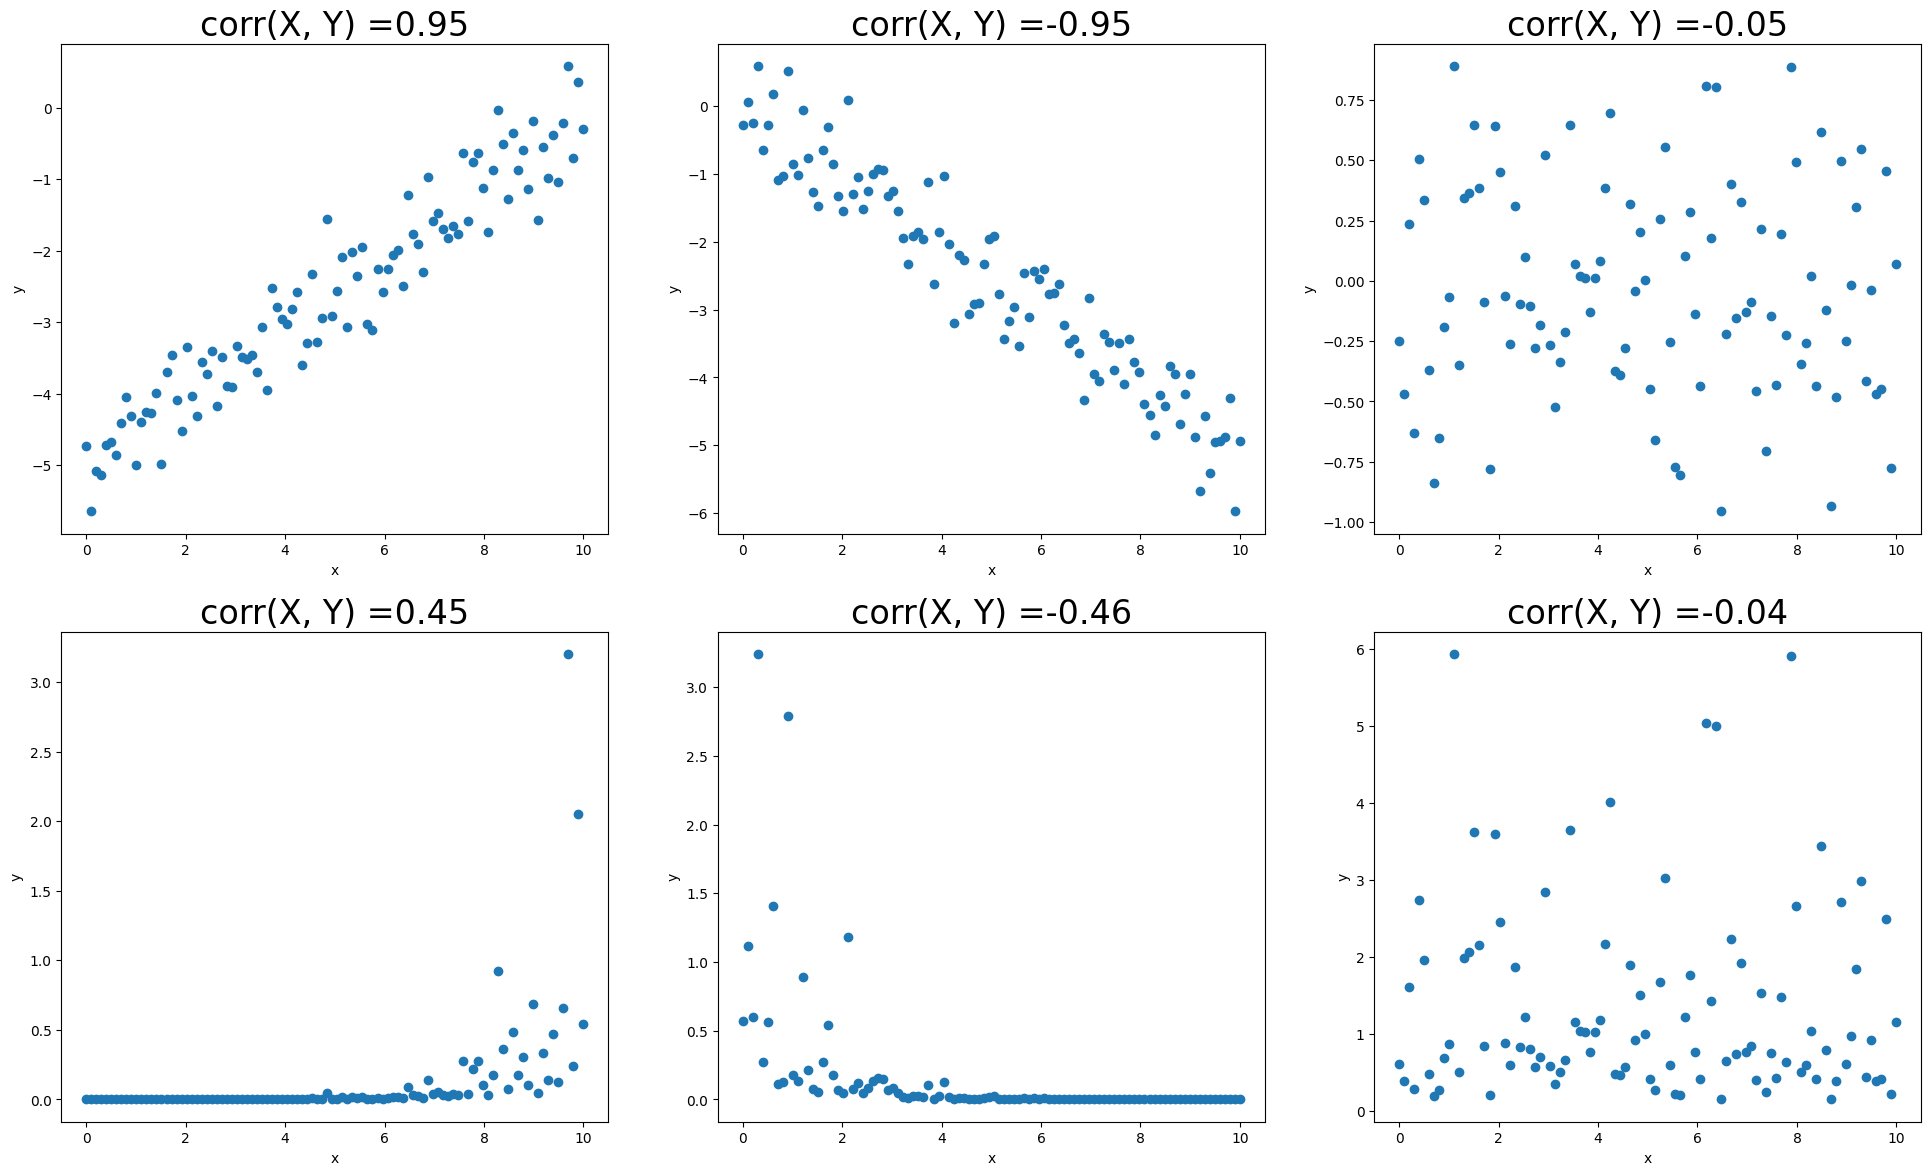

In [ ]:
fig = plt.figure(figsize=(24, 14))
variance = 0.5

# sample
n = 100
X = np.linspace(0, 10, n)
Y = [
    np.linspace(-5, 0, n) + np.random.normal(loc=0, scale=variance, size=X.shape),
    np.linspace(0, -5, n) + np.random.normal(loc=0, scale=variance, size=X.shape),
    np.random.normal(loc=0, scale=variance, size=X.shape)
]
Y.append((lambda x: np.exp(2*x))(Y[0]))
Y.append((lambda x: np.exp(2*x))(Y[1]))
Y.append((lambda x: np.exp(2*x))(Y[2]))

def draw(X, Y):
  plt.title(f'corr(X, Y) ={corr(X,Y):.2f}', fontsize=24)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.scatter(X, Y, label='data points')

row_count, col_count = 2, 3
for i in range(row_count):
  for j in range(col_count):
    indx =  i * col_count + j + 1
    plt.subplot(row_count, col_count, indx)
    draw(X, Y[indx-1])

plt.show()

Для подсчета корреляции используем scipy.stats.pearsonr

In [ ]:
X, Y, n = get_linear_data()
corr_matrix = stats.pearsonr(X, Y)
print(f"corr(X, Y) = {corr_matrix})")

corr(X, Y) = PearsonRResult(statistic=np.float64(0.9989393393972181), pvalue=np.float64(5.530073885264915e-12)))


#### Корреляционный коэффициент Спирмена

$$
r_s=corr(R[X],R[Y])=\frac{cov(R[X],R[Y])}{\sigma_{R[X]}\sigma_{R[Y]}}
$$

In [ ]:
# корреляционный коэффициент Спирмена
def spearman(X, Y):
  X_rank = stats.rankdata(X, method='dense')
  Y_rank = stats.rankdata(Y, method='dense')
  return corr(X_rank, Y_rank)

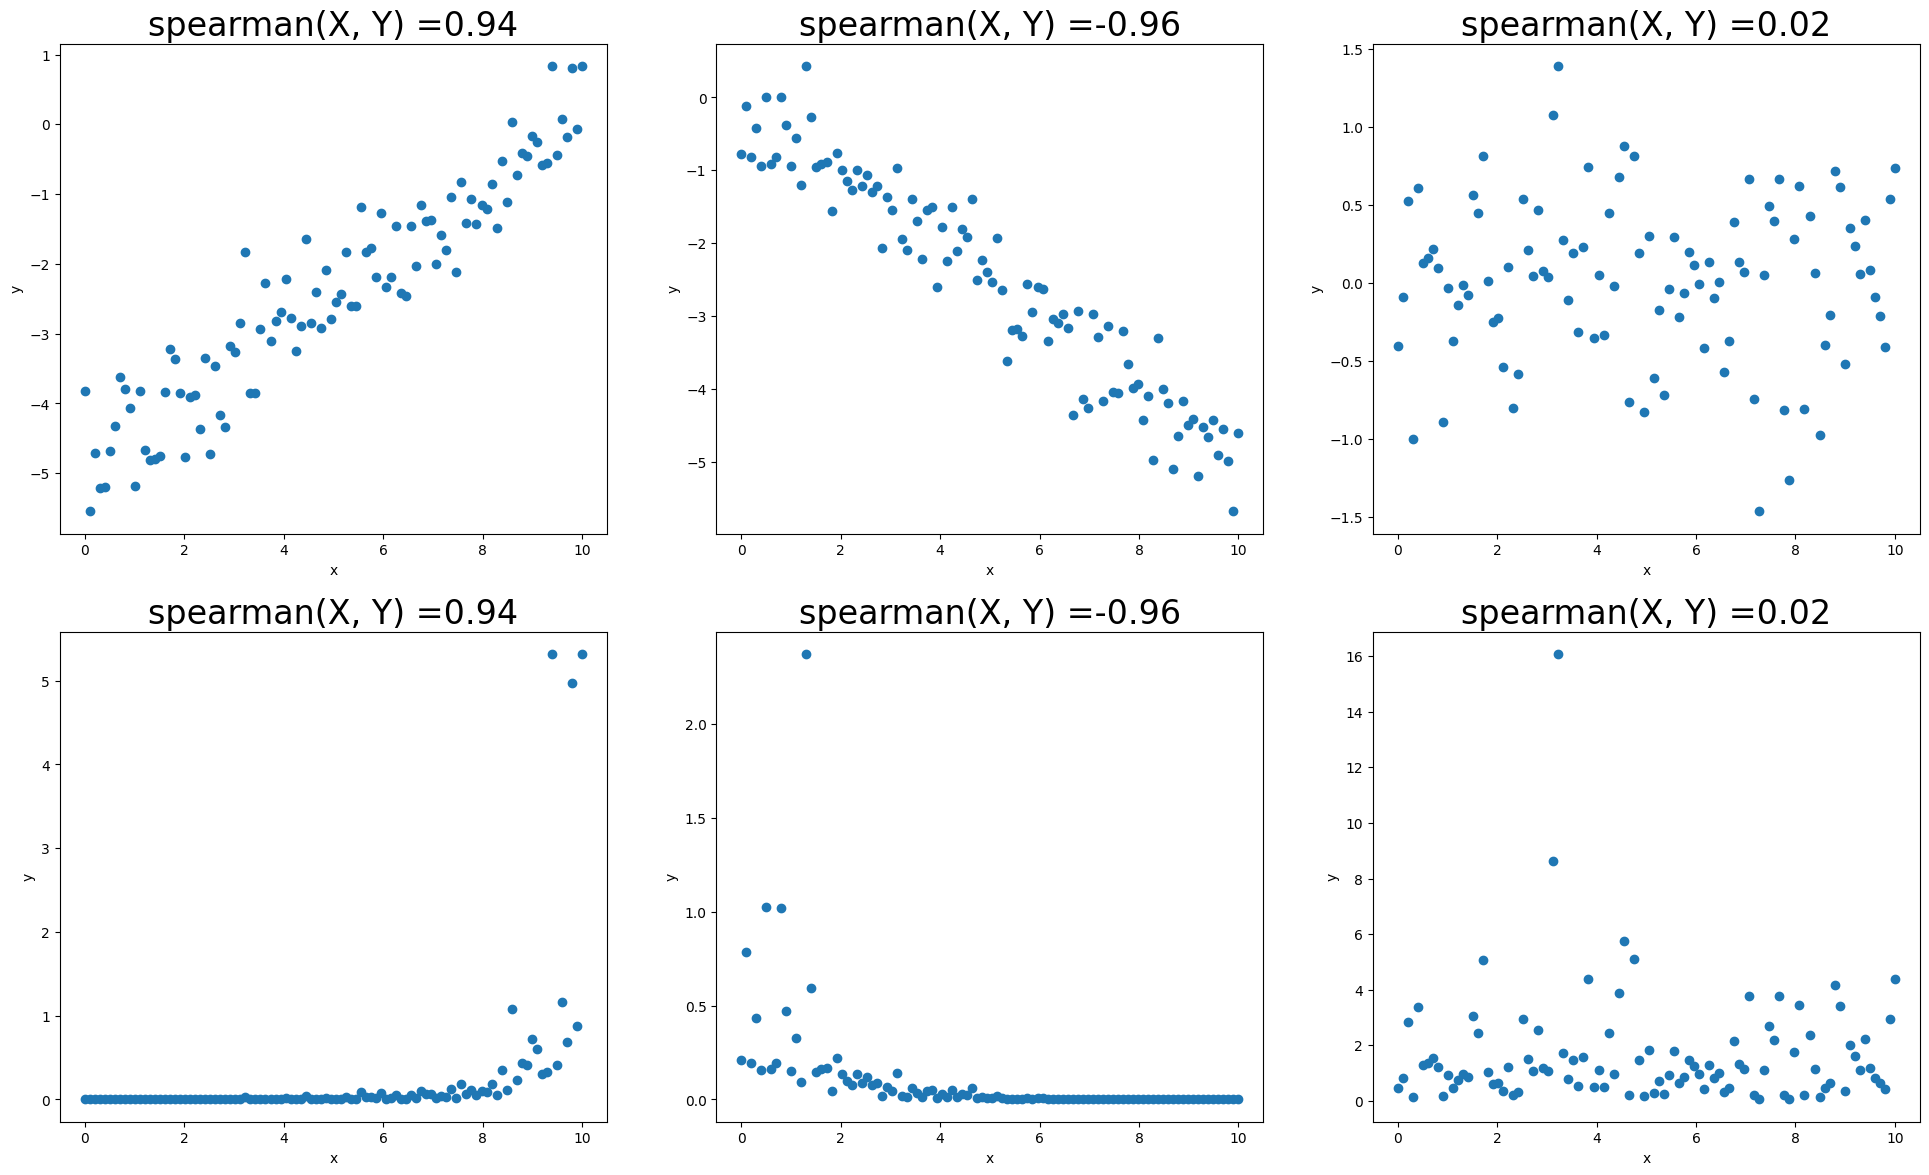

In [ ]:
fig = plt.figure(figsize=(24, 14))
variance = 0.5

# sample
n = 100
X = np.linspace(0, 10, n)
Y = [
    np.linspace(-5, 0, n) + np.random.normal(loc=0, scale=variance, size=X.shape),
    np.linspace(0, -5, n) + np.random.normal(loc=0, scale=variance, size=X.shape),
    np.random.normal(loc=0, scale=variance, size=X.shape)
]
Y.append((lambda x: np.exp(2*x))(Y[0]))
Y.append((lambda x: np.exp(2*x))(Y[1]))
Y.append((lambda x: np.exp(2*x))(Y[2]))

def draw(X, Y):
  plt.title(f'spearman(X, Y) ={spearman(X,Y):.2f}', fontsize=24)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.scatter(X, Y, label='data points')

row_count, col_count = 2, 3
for i in range(row_count):
  for j in range(col_count):
    indx =  i * col_count + j + 1
    plt.subplot(row_count, col_count, indx)
    draw(X, Y[indx-1])

plt.show()

Для подсчета корреляции используем scipy.stats.spearmanr

In [ ]:
X, Y, n = get_linear_data()
corr_matrix = stats.spearmanr(X, Y)
print(f"spearmanr(X, Y) = {corr_matrix})")

spearmanr(X, Y) = SignificanceResult(statistic=np.float64(0.9999999999999999), pvalue=np.float64(6.646897422032013e-64)))


#### Корреляционный коэффициент Кендалла


$$
\tau=\frac{2\sum_{i<j}sgn(x_j-x_i)sgn(y_j-y_i)}{n(n-1)}
$$

In [ ]:
# Сигнум функция
def sgn(x_i, x_j):
  if x_j - x_i < 0:
    return -1
  elif x_j - x_i > 0:
    return 1
  return 0

# коэффициент корреляции Кендалла
def kendall(X, Y):
  n = len(X)
  sgns = [sgn(X[i], X[j]) * sgn(Y[i], Y[j]) for i in range(n) for j in range(i + 1, n)]

  return 2 * np.sum(sgns) / (n * (n - 1))

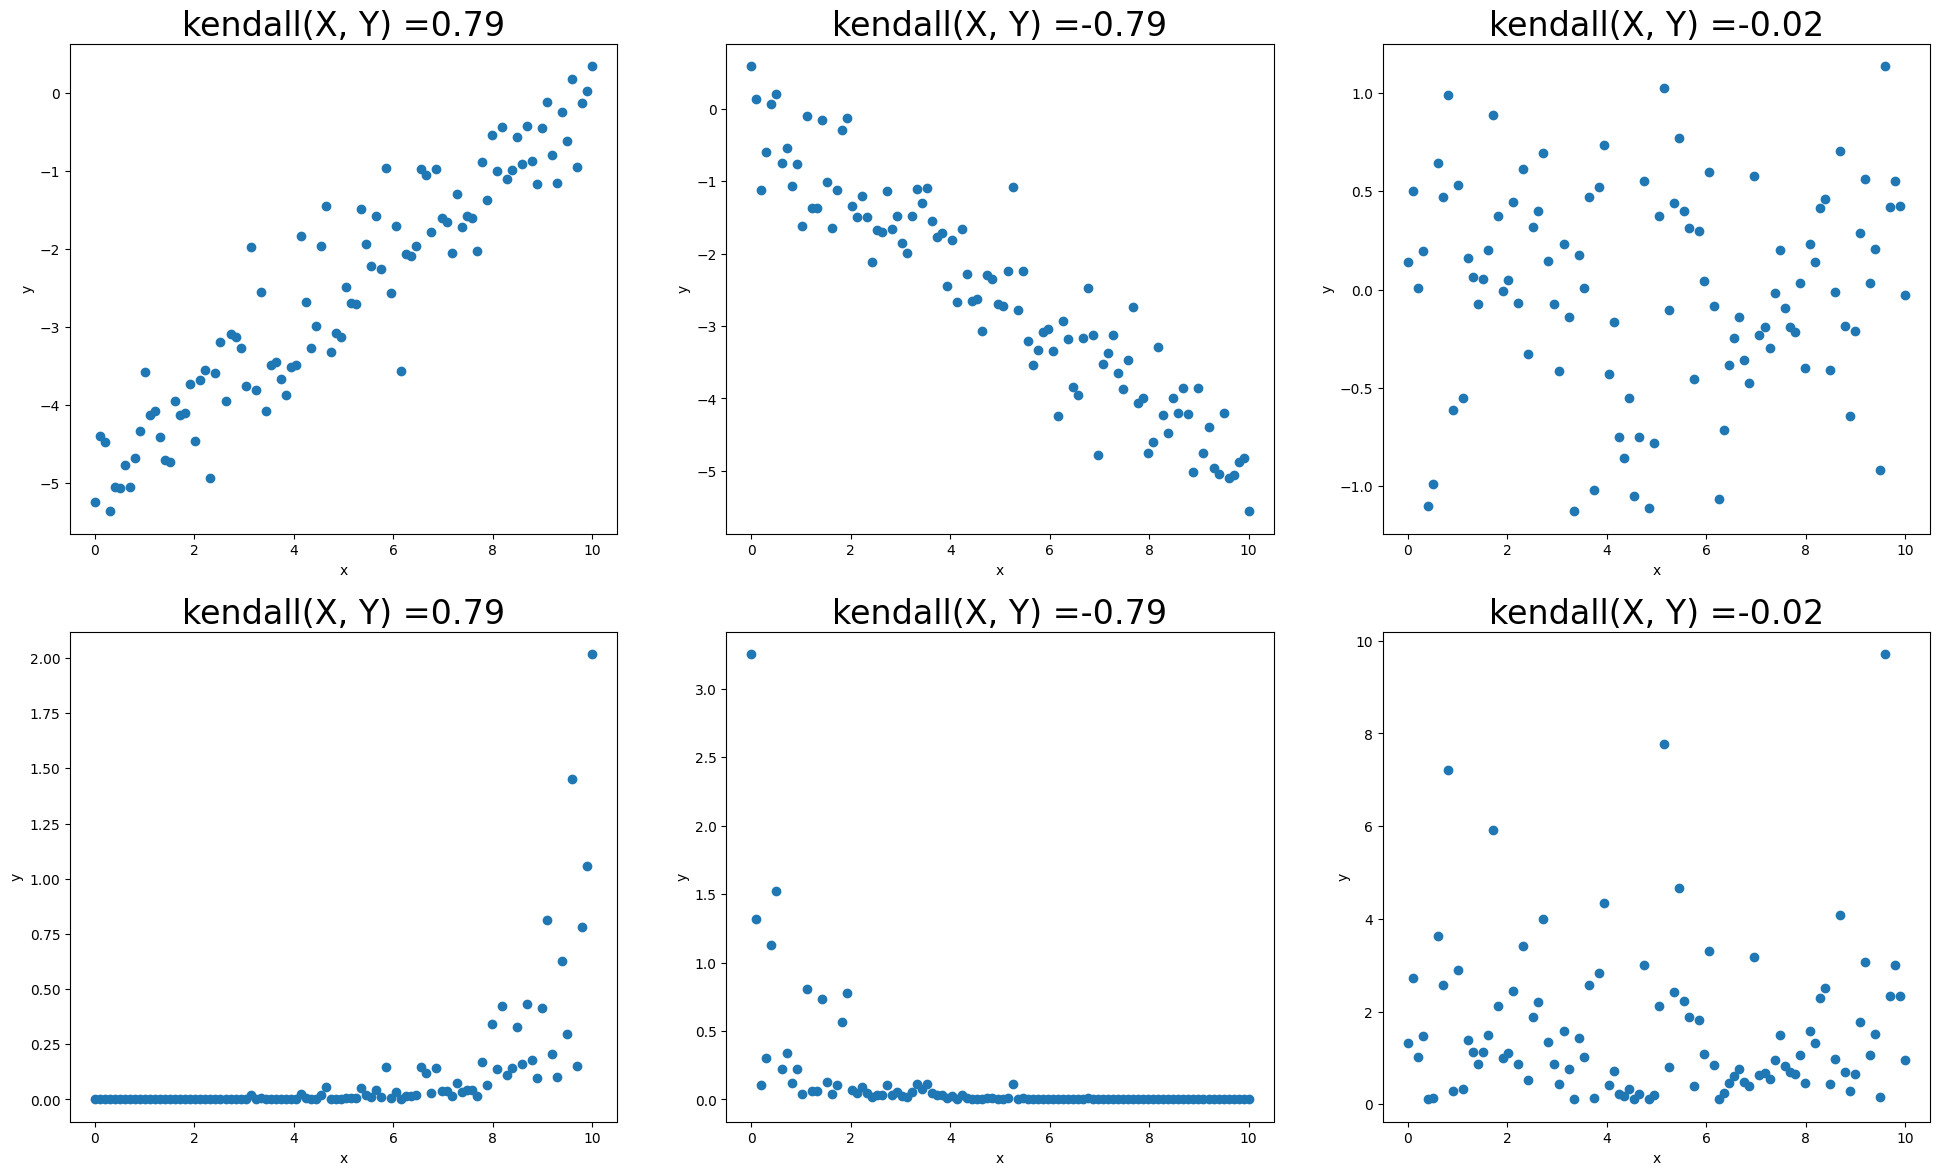

In [ ]:
fig = plt.figure(figsize=(24, 14))
variance = 0.5

# sample
n = 100
X = np.linspace(0, 10, n)
Y = [
    np.linspace(-5, 0, n) + np.random.normal(loc=0, scale=variance, size=X.shape),
    np.linspace(0, -5, n) + np.random.normal(loc=0, scale=variance, size=X.shape),
    np.random.normal(loc=0, scale=variance, size=X.shape)
]
Y.append((lambda x: np.exp(2*x))(Y[0]))
Y.append((lambda x: np.exp(2*x))(Y[1]))
Y.append((lambda x: np.exp(2*x))(Y[2]))

def draw(X, Y):
  plt.title(f'kendall(X, Y) ={kendall(X,Y):.2f}', fontsize=24)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.scatter(X, Y, label='data points')

row_count, col_count = 2, 3
for i in range(row_count):
  for j in range(col_count):
    indx =  i * col_count + j + 1
    plt.subplot(row_count, col_count, indx)
    draw(X, Y[indx-1])

plt.show()

Для подсчета корреляции используем scipy.stats.kendalltau

In [ ]:
X, Y, n = get_linear_data()
corr_matrix = stats.kendalltau(X, Y)
print(f"kendalltau(X, Y) = {corr_matrix})")

kendalltau(X, Y) = SignificanceResult(statistic=np.float64(0.9999999999999999), pvalue=np.float64(5.511463844797178e-07)))


## Выбор корреляционного коэффициента

### Ненормальные распределения

In [ ]:
n = 100
scale = 0.3
X = np.linspace(0, 10, n)
Y =  np.linspace(0, 5, n)

X_noise = X + stats.cauchy.rvs(loc=0, scale=scale, size=n)
Y_noise = Y + stats.cauchy.rvs(loc=0, scale=scale, size=n)

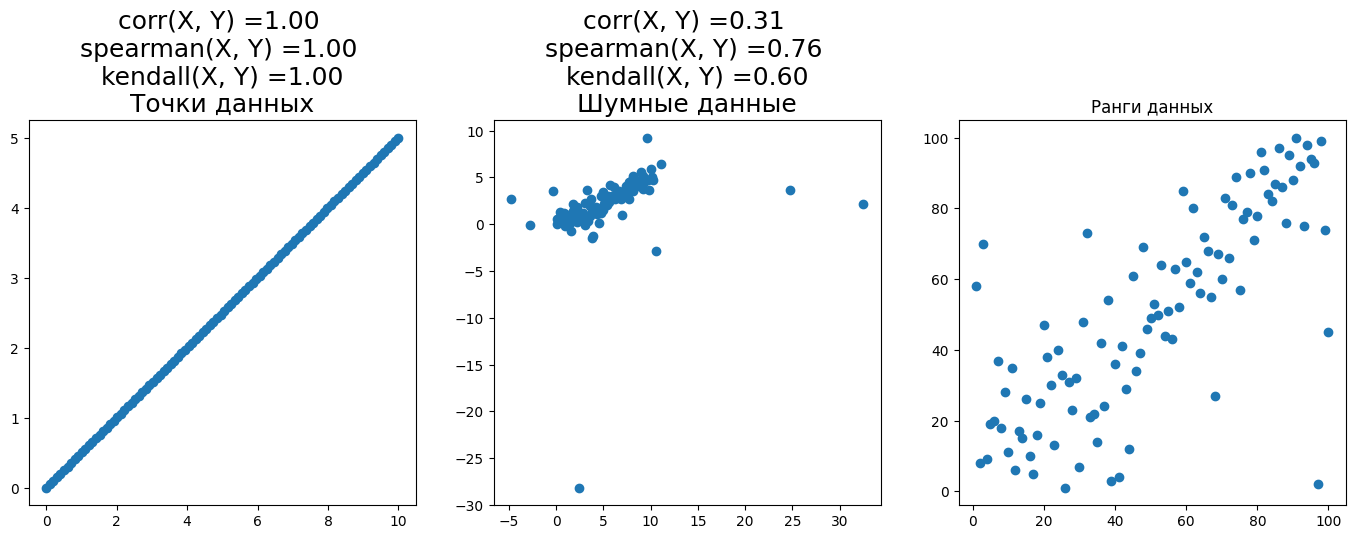

In [ ]:
plt.figure(figsize=(17, 5))
plt.subplot(131)
# plt.title('Точки данных')
plt.title(f'corr(X, Y) ={stats.pearsonr(X,Y).statistic:.2f} \
\nspearman(X, Y) ={stats.spearmanr(X,Y).statistic:.2f} \
\nkendall(X, Y) ={stats.kendalltau(X,Y).statistic:.2f}\n{"Точки данных"}', fontsize=18)
plt.scatter(X, Y)

plt.subplot(132)
plt.title(f'corr(X, Y) ={stats.pearsonr(X_noise,Y_noise).statistic:.2f} \
\nspearman(X, Y) ={stats.spearmanr(X_noise,Y_noise).statistic:.2f} \
\nkendall(X, Y) ={stats.kendalltau(X_noise,Y_noise).statistic:.2f}\n{"Шумные данные"}', fontsize=18)
plt.scatter(X_noise, Y_noise)

plt.subplot(133)
plt.title('Ранги данных')
X_rank = stats.rankdata(X_noise, method='dense')
Y_rank = stats.rankdata(Y_noise, method='dense')
plt.scatter(X_rank, Y_rank)

plt.show()

In [ ]:
z_X = np.abs(stats.zscore(X_noise))
z_Y = np.abs(stats.zscore(Y_noise))

thres = 3
X_clean = X_noise[(z_X < thres) & (z_Y < thres)]
Y_clean = Y_noise[(z_X < thres) & (z_Y < thres)]

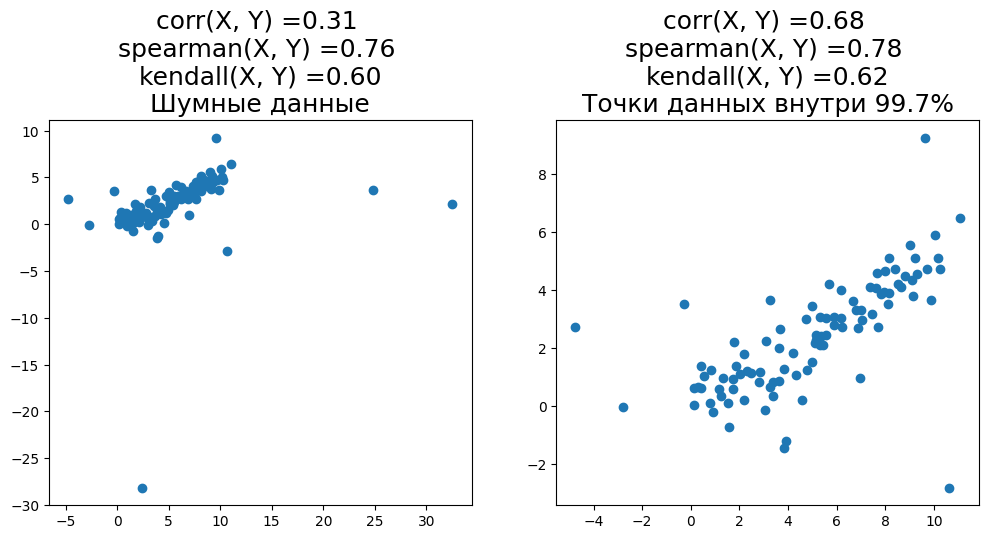

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(121)

plt.title(f'corr(X, Y) ={stats.pearsonr(X_noise,Y_noise).statistic:.2f} \
\nspearman(X, Y) ={stats.spearmanr(X_noise,Y_noise).statistic:.2f} \
\nkendall(X, Y) ={stats.kendalltau(X_noise,Y_noise).statistic:.2f}\n{"Шумные данные"}', fontsize=18)
plt.scatter(X_noise, Y_noise)

plt.subplot(122)
plt.title(f'corr(X, Y) ={stats.pearsonr(X_clean,Y_clean).statistic:.2f} \
\nspearman(X, Y) ={stats.spearmanr(X_clean,Y_clean).statistic:.2f} \
\nkendall(X, Y) ={stats.kendalltau(X_clean,Y_clean).statistic:.2f}\n{"Точки данных внутри 99.7%"}', fontsize=18)
plt.scatter(X_clean, Y_clean)

plt.show()

### Категориальные данные

In [ ]:
n = 100
scale = 0.5
categories = ['A', 'B', 'C', 'D', 'E']
probabilities = [0.05, 0.1, 0.2, 0.3, 0.35]

X = np.linspace(0, 10, n)
Y = np.random.choice(categories, n, p=probabilities)
# Y.sort()
# print(f'corr(X, Y) = {stats.pearsonr(X, Y).statistic:.2f}')
print(Y)
print(f'spearman(X, Y) = {stats.spearmanr(X, Y).statistic:.2f}')
print(f'kendall(X, Y) = {stats.kendalltau(X, Y).statistic:.2f}')

['E' 'B' 'C' 'E' 'D' 'C' 'B' 'C' 'D' 'E' 'C' 'D' 'E' 'D' 'E' 'C' 'E' 'E'
 'D' 'C' 'E' 'C' 'E' 'D' 'E' 'C' 'E' 'D' 'E' 'D' 'E' 'D' 'D' 'B' 'D' 'E'
 'D' 'B' 'D' 'E' 'D' 'D' 'C' 'E' 'D' 'A' 'C' 'E' 'C' 'B' 'B' 'D' 'E' 'C'
 'E' 'D' 'C' 'E' 'E' 'C' 'C' 'E' 'D' 'D' 'D' 'B' 'B' 'C' 'E' 'D' 'E' 'C'
 'C' 'D' 'E' 'E' 'B' 'E' 'D' 'D' 'C' 'D' 'D' 'E' 'D' 'C' 'E' 'D' 'E' 'C'
 'D' 'C' 'C' 'D' 'A' 'C' 'B' 'E' 'D' 'C']
spearman(X, Y) = -0.08
kendall(X, Y) = -0.08


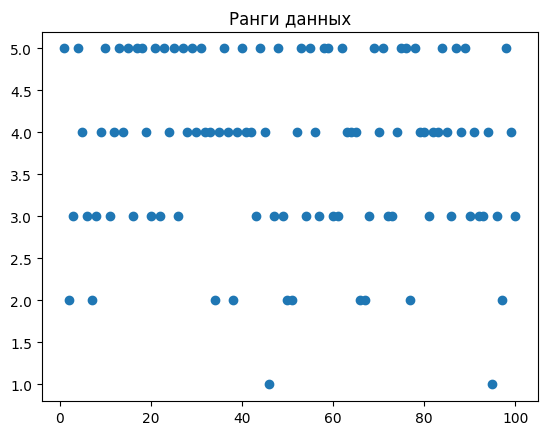

In [ ]:
plt.title('Ранги данных')
X_rank = stats.rankdata(X, method='dense')
Y_rank = stats.rankdata(Y, method='dense')
plt.scatter(X_rank, Y_rank)

plt.show()

### Монотонная зависимость

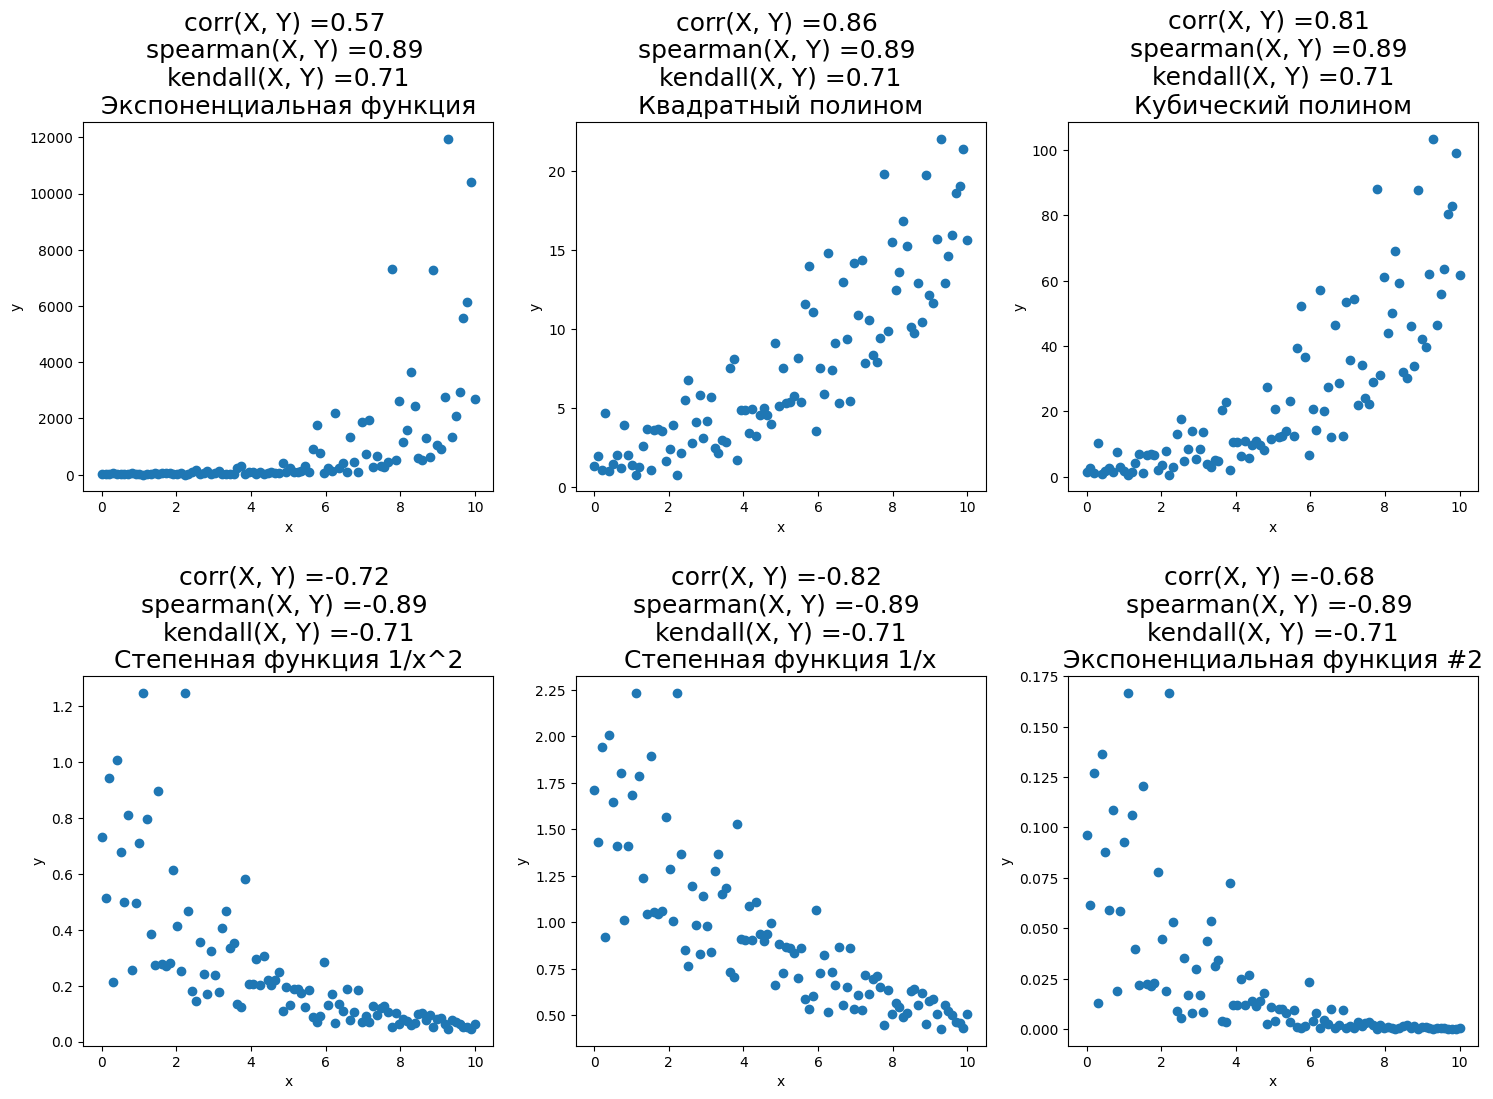

In [ ]:
fig = plt.figure(figsize=(18, 12))
variance = 0.5

# sample
n = 100
X = np.linspace(0, 10, n)
sample = np.linspace(1, 4, n) + np.random.normal(loc=0, scale=variance, size=X.shape)
Y = []
titles = ['Экспоненциальная функция', 'Квадратный полином', 'Кубический полином', 'Степенная функция 1/x^2', 'Степенная функция 1/x', 'Экспоненциальная функция #2']
Y.append((lambda x: np.exp(2*x))(sample))
Y.append((lambda x: x ** 2)(sample))
Y.append((lambda x: x ** 3)(sample))
Y.append((lambda x: 1/(x ** 2))(sample))
Y.append((lambda x: 2/x)(sample))
Y.append((lambda x: 1/np.exp(2*x))(sample))

def draw(X, Y, title):
  plt.title(f'corr(X, Y) ={stats.pearsonr(X,Y).statistic:.2f} \
\nspearman(X, Y) ={stats.spearmanr(X,Y).statistic:.2f} \
\nkendall(X, Y) ={stats.kendalltau(X,Y).statistic:.2f}\n{title}', fontsize=18)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.scatter(X, Y, label='data points')

plt.subplots_adjust(hspace=0.5)
row_count, col_count = 2, 3
for i in range(row_count):
  for j in range(col_count):
    indx =  i * col_count + j + 1
    plt.subplot(row_count, col_count, indx)
    draw(X, Y[indx-1], titles[indx-1])

plt.show()

### Немонотонная функция

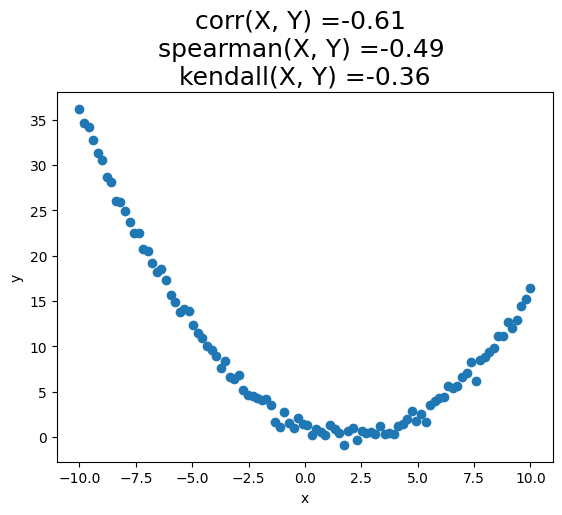

In [ ]:
X = np.linspace(-10, 10, n)
Y = (lambda x: x ** 2)(np.linspace(-6, 4, n)) + np.random.normal(loc=0, scale=variance, size=X.shape)

plt.title(f'corr(X, Y) ={stats.pearsonr(X,Y).statistic:.2f} \
\nspearman(X, Y) ={stats.spearmanr(X,Y).statistic:.2f} \
\nkendall(X, Y) ={stats.kendalltau(X,Y).statistic:.2f}', fontsize=18)
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X, Y, label='data points')

plt.show()

**Почему корреляция для выборки выше некорректна?**

## Вычисление коэффициента корреляции и проверка его статистической значимости

P-значение (p-value) - это вероятность получения текущего результата, если бы коэффициент корреляции на самом деле был равен нулю (нулевая гипотеза). Если эта вероятность ниже общепринятых $5\% $ ($P<0.05$), коэффициент корреляции называется статистически значимым.

In [ ]:
def correlation_is_significant(pvalue, significance_level=0.05):
  return pvalue < significance_level

In [ ]:
n = 5
X = np.linspace(0, 10, n)
Y = np.linspace(-4, 0, n) + np.random.normal(loc=0.5, scale=0.5, size=X.shape)
Y = np.exp(Y)

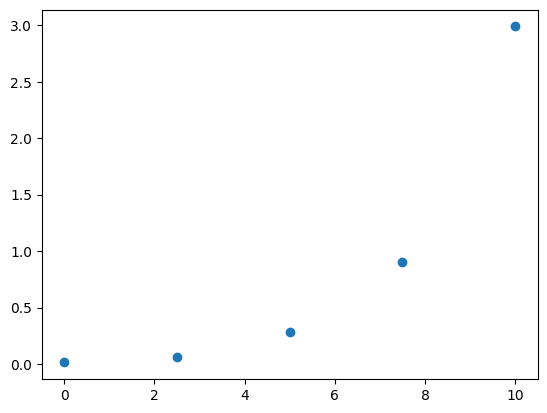

In [ ]:
plt.scatter(X, Y)
plt.show()

In [ ]:
alpha = 0.05
pearsonr = stats.pearsonr(X, Y)
spearmanr = stats.spearmanr(X, Y)
kendalltau = stats.kendalltau(X, Y)
print(f"Коэффициент Пирсона r = {pearsonr.statistic} значим для уровня значимости alpha = {alpha} и {pearsonr.pvalue}: {correlation_is_significant(pearsonr.pvalue, alpha)}", )
print(f"Коэффициент Спирмена r = {spearmanr.statistic} значим для уровня значимости alpha = {alpha} и {spearmanr.pvalue}: {correlation_is_significant(spearmanr.pvalue, alpha)}", )
print(f"Коэффициент Кендалла tau = {kendalltau.statistic} значим для уровня значимости alpha = {alpha} и {kendalltau.pvalue}: {correlation_is_significant(kendalltau.pvalue, alpha)}", )

Коэффициент Пирсона r = 0.8609376627096599 значим для уровня значимости alpha = 0.05 и 0.060936163930315666: False
Коэффициент Спирмена r = 0.9999999999999999 значим для уровня значимости alpha = 0.05 и 1.4042654220543672e-24: True
Коэффициент Кендалла tau = 0.9999999999999999 значим для уровня значимости alpha = 0.05 и 0.016666666666666666: True


## Пример корреляционного анализа

### Загружаем данные с Kaggle

In [ ]:
import kagglehub
import os

# https://www.kaggle.com/datasets/uciml/autompg-dataset/code?datasetId=1489
path = kagglehub.dataset_download("uciml/autompg-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'autompg-dataset' dataset.
Path to dataset files: /kaggle/input/autompg-dataset


Columns Description

1. mpg: miles per galon of fuel (continuous variable).
2. cylinders: number of engine cylinders (multi-valued discrete variable).
3. displacement: (continuous variable)
4. horsepower: the power produced by engine to move the car (continuous variable)
5. weight: car weight (continuous variable)
6. acceleration: the acceleration an engine can get per second (continuous variable)
7. model year: car release year from 1970 to 1982(multi-valued discrete variable)
8. origin: car manufacturing place (1 -> USA, 2 -> Europe, 3 -> Asia) (multi-valued discrete variable)
9. car name: car model name (unique for each instance)

In [ ]:
df = pd.read_csv(os.path.join(path, 'auto-mpg.csv'), index_col='car name')

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


### Очистка данных

In [ ]:
df.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,object
weight,int64
acceleration,float64
model year,int64
origin,int64


In [ ]:
df = df[df.horsepower != '?']
df['horsepower'] = df['horsepower'].astype('float')

In [ ]:
df.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,float64
weight,int64
acceleration,float64
model year,int64
origin,int64


### Корреляционный анализ с помощью seaborn

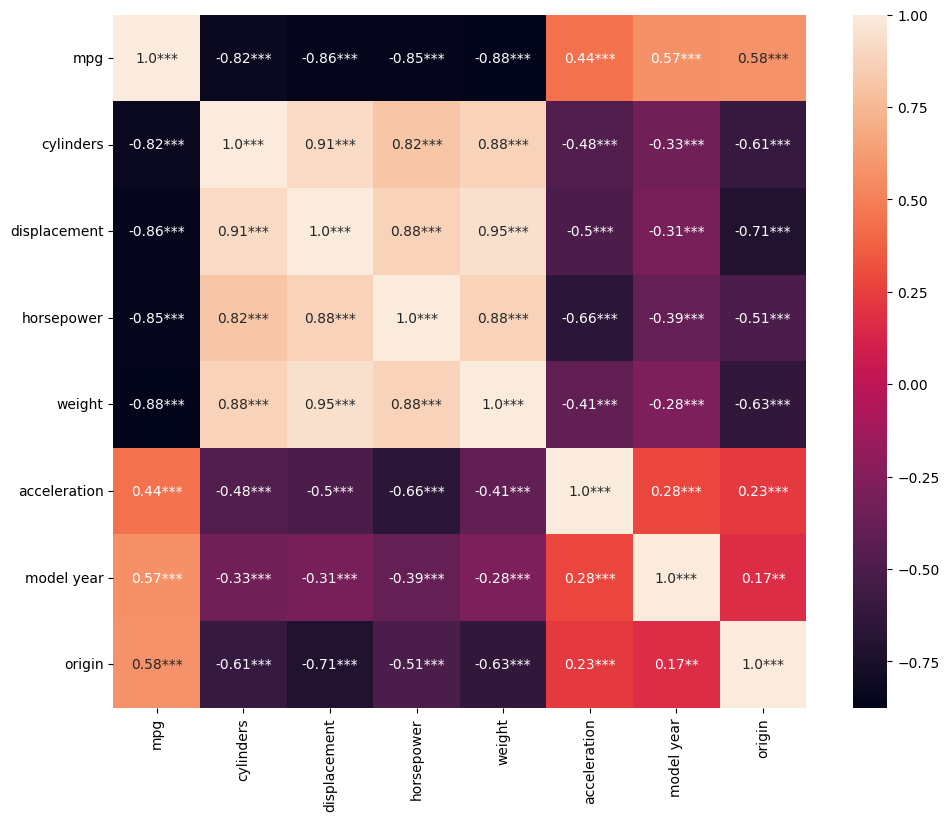

In [ ]:
import seaborn as sns

rho = df.corr(method='spearman')
pvalues = df.corr(method=lambda x, y: stats.spearmanr(x, y)[1]) - np.eye(*rho.shape)

corrmat_str = pvalues.map(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
corrmat_str = rho.round(2).astype(str) + corrmat_str

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(rho, square=True, annot=corrmat_str, fmt='');